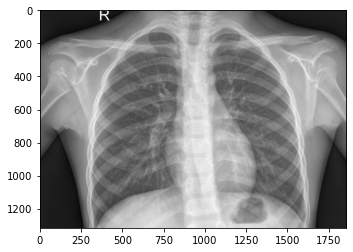

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle


DATADIR = "D:/Depo/tasarim/archive-3/chest_xray/test" #verilerin bulunduğu dosya konumunun belirtilmesi

CATEGORIES = ["NORMAL", "PNEUMONIA"]

for category in CATEGORIES:  # "NORMAL" ve "PNEUMONIA" kategorileri için for döngüsü
    path = os.path.join(DATADIR,category)  # 
    for img in os.listdir(path):  # her resim için for döngüsüyle iterasyon
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # resimler array formatına dönüştürülüyor
        plt.imshow(img_array, cmap='gray')


        break  
    break  

In [80]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

In [81]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # "NORMAL" ve "PNEUMONIA" kategorileri için for döngüsü

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # verilerin sınıflandırılması  (0 veya 1). 0=NORMAL 1=PNEUMONIA

        for img in tqdm(os.listdir(path)):  # her resim için iterasyon
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # resmi arraye dönüştürme
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resmi standart boyuta küçültme
                training_data.append([new_array, class_num])  # resimlerin değiştirilmiş halini ekleme
            except Exception as e:  
                pass

create_training_data()

print(len(training_data))

100%|███████████████████████████████████████████████████████████████████████████████| 390/390 [00:03<00:00, 122.82it/s]

624


In [82]:
import random

random.shuffle(training_data)

In [83]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [75]
   [ 0]
   [ 0]]

  ...

  [[ 0]
   [ 0]
   [ 0]
   ...
   [12]
   [ 1]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]]]


In [84]:
X = X/255.0

model = Sequential()
#yapay sinir ağının katmanlarının kurulması ve CNN yönteminin uygulanması
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  

model.add(Dense(256))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


X = np.array(X)


y = np.array(y)


model.fit(X, y, batch_size=32, epochs=6, validation_split=0.3)

Epoch 1/6
14/14 [==============================] - 96s 6s/step - loss: 6.9414 - accuracy: 0.5986 - val_loss: 0.7191 - val_accuracy: 0.5479
Epoch 2/6
14/14 [==============================] - 79s 6s/step - loss: 0.3785 - accuracy: 0.8119 - val_loss: 0.4003 - val_accuracy: 0.8564
Epoch 3/6
14/14 [==============================] - 79s 6s/step - loss: 0.3803 - accuracy: 0.8624 - val_loss: 0.4441 - val_accuracy: 0.7979
Epoch 4/6
14/14 [==============================] - 78s 6s/step - loss: 0.2464 - accuracy: 0.8945 - val_loss: 0.4441 - val_accuracy: 0.8298
Epoch 5/6
14/14 [==============================] - 79s 6s/step - loss: 0.1363 - accuracy: 0.9427 - val_loss: 0.4164 - val_accuracy: 0.8617
Epoch 6/6
14/14 [==============================] - 79s 6s/step - loss: 0.0666 - accuracy: 0.9817 - val_loss: 0.4584 - val_accuracy: 0.8511


In [107]:
#kodun bu kısmı istediğimiz veriyi ekleyip çıktı almamızı sağlıyor
path =r"D:\Depo\tasarim\archive-3\chest_xray\train\PNEUMONIA\person7_bacteria_28.jpeg"#test etmek istediğimiz verinin konumu
new_img = tf.keras.utils.load_img(
    path, target_size=(IMG_SIZE, IMG_SIZE))


img_array = tf.keras.utils.img_to_array(new_img)
img_array = tf.expand_dims(img_array, 0)
img_array2 = tf.image.rgb_to_grayscale(img_array, name=None)

predictions = model.predict(img_array2)
score = tf.nn.softmax(predictions)
if predictions==0:
    print("Healthy")
else:
    print("Pneumonia")

1/1 [==============================] - 0s 108ms/step
Pneumonia
